# Titanic Survival Binary Classification model 

### Logistic Regression Overview

logistic regression uses a sigmoid function to divide data into two classes. 
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
where z is a linear combination of input features:
$$ z = b + w_1x_1 + w_2x_2 + ... + w_nx_n $$
it uses the binary cross-entropy loss function to calculate loss.
$$ L = - \frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $$
and optimizes the weights using gradient descent.
$$ w_i := w_i - \alpha \frac{\partial L}{\partial w_i}$$
$$ b := b - \alpha \frac{\partial L}{\partial b}$$
$$ \frac{\partial L}{\partial w_i} = x_i(\hat{y} - y) $$

Import and preprocess dataset

In [26]:
import pandas as pd
import numpy as np 

df = pd.read_csv('train.csv')
df.head()
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [27]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
x = df.drop('Survived', axis=1).values.astype(float)
y = df['Survived'].values

C:\Users\Elfrh\AppData\Local\Temp\ipykernel_20696\1252687251.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Elfrh\AppData\Local\Temp\ipykernel_20696\1252687251.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

The logistic regression model

In [28]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, x, y):

        rows, cols = x.shape
        self.weights = np.zeros(cols)
        self.bias = 0
        for i in range(self.epochs):
            z = np.dot(x, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            correct = 0
            loss = 0
            for j in range(rows):
                if (y[j] == 1 and y_pred[j] >= 0.5) or (y[j] == 0 and y_pred[j] < 0.5):
                    correct += 1
                loss += - (y[j] * np.log(y_pred[j]) + (1 - y[j]) * np.log(1 - y_pred[j]))
                
            accuracy = correct / rows
            if i % 100 == 0:
                print(f'Epoch {i}, Accuracy: {accuracy:.4f}, Loss: {loss/rows:.4f}')

            dw = (1 / rows) * np.dot(x.T, (y_pred - y))
            db = (1 / rows) * np.sum(y_pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_class)
    



In [31]:
model = LogisticRegression(learning_rate=0.001, epochs=20000)
model.fit(x, y)


Epoch 0, Accuracy: 0.3838, Loss: 0.6931
Epoch 500, Accuracy: 0.6880, Loss: 0.6108
Epoch 1000, Accuracy: 0.6936, Loss: 0.5997
Epoch 1500, Accuracy: 0.6925, Loss: 0.5910
Epoch 2000, Accuracy: 0.6981, Loss: 0.5836
Epoch 2500, Accuracy: 0.7015, Loss: 0.5771
Epoch 3000, Accuracy: 0.7059, Loss: 0.5712
Epoch 3500, Accuracy: 0.7082, Loss: 0.5657
Epoch 4000, Accuracy: 0.7116, Loss: 0.5606
Epoch 4500, Accuracy: 0.7149, Loss: 0.5558
Epoch 5000, Accuracy: 0.7160, Loss: 0.5513
Epoch 5500, Accuracy: 0.7217, Loss: 0.5470
Epoch 6000, Accuracy: 0.7262, Loss: 0.5429
Epoch 6500, Accuracy: 0.7273, Loss: 0.5390
Epoch 7000, Accuracy: 0.7295, Loss: 0.5353
Epoch 7500, Accuracy: 0.7318, Loss: 0.5318
Epoch 8000, Accuracy: 0.7374, Loss: 0.5284
Epoch 8500, Accuracy: 0.7407, Loss: 0.5252
Epoch 9000, Accuracy: 0.7419, Loss: 0.5222
Epoch 9500, Accuracy: 0.7452, Loss: 0.5193
Epoch 10000, Accuracy: 0.7430, Loss: 0.5165
Epoch 10500, Accuracy: 0.7531, Loss: 0.5139
Epoch 11000, Accuracy: 0.7587, Loss: 0.5113
Epoch 11500,

### Evaluation Metrics for Classification

1.  **Accuracy**: The ratio of correctly predicted observations to the total observations.
    *   *Formula*: $(TP + TN) / Total$
    *   *When to use*: When the dataset is **balanced** (similar number of survived vs. died).

2.  **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
    *   *Formula*: $TP / (TP + FP)$
    *   *When to use*: When the cost of **False Positives** is high (e.g., predicting a safe email as spam).

3.  **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to the all observations in actual class.
    *   *Formula*: $TP / (TP + FN)$
    *   *When to use*: When the cost of **False Negatives** is high (e.g., predicting a sick patient as healthy).

4.  **F1 Score**: The weighted average of Precision and Recall.
    *   *Formula*: $2 * (Precision * Recall) / (Precision + Recall)$
    *   *When to use*: When you need a balance between Precision and Recall, or when the class distribution is **imbalanced**.

In [33]:
df_eval = pd.read_csv('test.csv')
dv_res = pd.read_csv('gender_submission.csv')

df_eval['Age'].fillna(df_eval['Age'].median(), inplace=True)
df_eval['Embarked'].fillna(df_eval['Embarked'].mode()[0], inplace=True)
df_eval.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
df_eval["Sex"] = df_eval["Sex"].map({"male": 0, "female": 1})
df_eval = pd.get_dummies(df_eval, columns=['Embarked'], drop_first=True)

# Make sure columns match training data
train_features = df.drop('Survived', axis=1).columns
df_eval = df_eval.reindex(columns=train_features, fill_value=0)

x_test_final = df_eval.values.astype(float)
y_test_final = dv_res['Survived'].values

C:\Users\Elfrh\AppData\Local\Temp\ipykernel_20696\4250745131.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eval['Age'].fillna(df_eval['Age'].median(), inplace=True)
C:\Users\Elfrh\AppData\Local\Temp\ipykernel_20696\4250745131.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

Test Accuracy:  0.9043
Test Precision: 0.9000
Test Recall:    0.8289
Test F1 Score:  0.8630


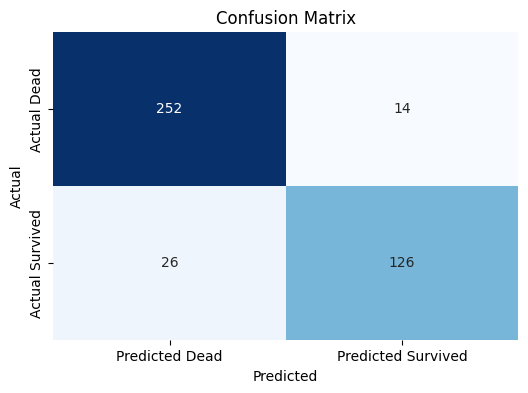

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_test = model.predict(x_test_final)

acc = accuracy_score(y_test_final, y_pred_test)
prec = precision_score(y_test_final, y_pred_test)
rec = recall_score(y_test_final, y_pred_test)
f1 = f1_score(y_test_final, y_pred_test)

print(f"Test Accuracy:  {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall:    {rec:.4f}")
print(f"Test F1 Score:  {f1:.4f}")

cm = confusion_matrix(y_test_final, y_pred_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Dead', 'Predicted Survived'],
            yticklabels=['Actual Dead', 'Actual Survived'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

plt.figure(figsize=(8, 5))